## Plan:
1. EDA on train data, find out summary including shape, data type, data distribution
2. Clean data
3. Train Test split
4. Fix missing data
5. Encode categorical variables
6. Feature selection (Correlation on numerical features, boxplot on categorical features, automatically select the most informative)
7. Build/Tune Model (Ensemble: RandomTreeForest, XGBoost, etc)
8. Evaluation

### 1). Load Data and Preliminaru Analysis

##### The goal of this section is to load data and get a general idea about the data that I will be dealing with.

In [1]:
# import requried libraries for data wrangling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import training data and testing data
train_data = pd.read_csv('train.csv', index_col= 'Id')
test_data = pd.read_csv('test.csv', index_col = 'Id')

In [3]:
# check columns
print(train_data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
# set target varaible 
y_full = train_data['SalePrice'].copy()
# drop target column, as well as columns that contain leakage information
leak_cols = ['MoSold', 'YrSold', 'SaleType', 'SaleCondition']
X_full = train_data.drop(['SalePrice'] + leak_cols, axis = 1)

In [5]:
# Check the unique column types
X_full.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
# create lists that contain numerical and categorical column names
num_cols = [col for col in X_full.columns if X_full[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in X_full.columns if X_full[col].dtype == 'object']
# check the size of these two lists
print('There are {} numerical columns'.format(len(num_cols)))
print('And {} categorical columns'.format(len(cat_cols)))

There are 34 numerical columns
And 41 categorical columns


In [7]:
# split data in training and validation set
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, train_size = 0.8, random_state = 1)

In [8]:
pd.set_option('display.max_columns', 500)
X_train_full[num_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1168.000000,959.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1107.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.733733,70.210636,10542.357877,6.134418,5.596747,1971.756849,1985.384418,105.122414,452.736301,44.667808,572.617295,1070.021404,1176.254281,340.278253,5.094178,1521.626712,0.437500,0.059075,1.571918,0.380137,2.872432,1.048801,6.548801,0.619863,1978.715447,1.774829,474.120719,94.656678,47.315925,22.753425,3.654110,16.113870,2.418664,49.948630
std,42.080779,24.838423,9875.947661,1.369861,1.111237,30.291881,20.587897,178.078113,463.541117,161.909961,448.642738,448.141915,395.462440,434.272050,45.317916,523.534530,0.521547,0.239472,0.546045,0.504665,0.818589,0.219484,1.626478,0.648787,24.977592,0.734614,210.856384,122.161984,67.699475,62.710765,31.103419,57.769137,37.390139,551.953605
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,223.750000,804.000000,888.000000,0.000000,0.000000,1133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,398.500000,0.000000,484.000000,1007.500000,1098.500000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,80.000000,11621.750000,7.000000,6.000000,2001.000000,2004.000000,170.250000,728.750000,0.000000,815.250000,1314.500000,1422.000000,728.000000,0.000000,1790.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.500000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,1872.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [9]:
X_train_full[cat_cols].describe(include= ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature
count,1168,1168,71,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1160,1168,1168,1168,1138,1138,1137,1138,1137,1168,1168,1168,1167,1168,1168,620,1107,1107,1107,1107,1168,5,214,44
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,14,16,4,4,5,6,4,4,4,6,6,6,4,2,5,4,7,5,6,3,5,5,3,3,4,4
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed
freq,927,1165,38,727,1051,1167,833,1110,180,1000,1155,974,591,911,1147,432,422,678,709,1026,525,513,1048,745,349,1014,1142,605,1094,1071,574,1092,311,717,468,1049,1063,1072,3,118,39


### 2). Baseline model:
##### Based on the information presented in Section 1), I see that there are both categorical and numerical data, both with some missing values. So the plan is to create a simple baseline model to gauge future performance of future designs. This baseline model is created with the following design considerations:
1. Use numerical predictors only
2. Impute missing entries with mean, with indicators
3. Model with XGBoost (XGBRegressor)
4. Evaluate with MAE (Mean Absolute Error)

In [10]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
# use numerical predictors for training
X_train_bl = X_train_full[num_cols]
X_test_bl = X_test_full[num_cols]
# impute missing value
# create a list that contains the names of columns with missing entries
num_miss_cols = [col for col in X_train_bl if X_train_bl[col].isnull().any() == True]
# keep track of which entries are imputed
for col in num_miss_cols:
    X_train_bl[col + '_missing'] = X_train_bl[col].isnull()
    X_test_bl[col + '_missing'] = X_test_bl[col].isnull()
# impute missing value with column mean
imputer_bl = SimpleImputer()
imputed_X_train_bl = pd.DataFrame(imputer_bl.fit_transform(X_train_bl), columns = X_train_bl.columns)
imputed_X_test_bl = pd.DataFrame(imputer_bl.transform(X_test_bl), columns= X_test_bl.columns)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [11]:
# define a function for baseline model genereation and model evaluation
def score_bl(X_train, X_test, y_train, y_test):
    # create a XGBRegressor model and fit using training data
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
    model.fit(X_train, y_train)
    # make out-of-sample and in-sample predictions
    y_predict_outsample = model.predict(X_test)
    y_predict_insample = model.predict(X_train)
    # calculate the mean absolute error of out-of-sample and in-sample predictions
    outsample_MAE = mean_absolute_error(y_predict_outsample, y_test)
    insample_MAE = mean_absolute_error(y_predict_insample, y_train)
    return outsample_MAE, insample_MAE

# apply score funciton to baseline training and testing data
bl_outsample_error, bl_insample_error = score_bl(imputed_X_train_bl, imputed_X_test_bl, y_train_full, y_test_full)
# print out-of-sample and in-sample prediction errors
print('Out-of-Sample mean-absolute-error is: {}'.format(bl_outsample_error))
print('In-Sample mean-absolute-error is: {}'.format(bl_insample_error))

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:55:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Out-of-Sample mean-absolute-error is: 15134.871468321919
In-Sample mean-absolute-error is: 5988.2507491438355


##### Based on the result shown from the Baseline model, we can see that the In-Sample MAE is pretty significant, which indicates that the model might be slightly underfitting. This is reasonable considering that the model did not use categorical predictors, which might contain a lot of useful information. Additionally, there is clearly a huge gap between the Out-of-Sample MAE and In-Sample MAE. This suggests that there is a high variance (overfitting) produced by the model. In order to minimize this, I need to be more selective about predictors and potentially use regularization. 

### 3). EDA
##### In this section, I will do some analysis on correlation, as well as distribution of predictors that I find interesting. Hopefully, this will give me some valuable insights on the following 3 important preprocessing aspects:
- Feature (predictors) selection and generation
- Missing value imputation
- categorical feature encoding

In [12]:
# create separate dataframe for numerical features and categorical features
num_ft = X_train_full[num_cols]
cat_ft = X_train_full[cat_cols]
# check correlation between numerical features and target
num_target = num_ft.join(y_train_full)
num_target_corr = pd.DataFrame(num_target.corr())
num_target_corr = num_target_corr['SalePrice'].sort_values( ascending = False)
# get high correlated (> 0.5)numerical features and botton 10 numerical features
print('Highly correlated (> 0.5) features with SalePrice:')
print(num_target_corr[num_target_corr >0.5])
print('Botton 10 correlated features with SalePrice:')
print(num_target_corr.tail(10))

Highly correlated (> 0.5) features with SalePrice:
SalePrice       1.000000
OverallQual     0.784018
GrLivArea       0.690093
GarageCars      0.642246
GarageArea      0.626644
TotalBsmtSF     0.602963
1stFlrSF        0.599087
FullBath        0.572780
TotRmsAbvGrd    0.531618
YearBuilt       0.520458
YearRemodAdd    0.510345
Name: SalePrice, dtype: float64
Botton 10 correlated features with SalePrice:
3SsnPorch        0.037551
PoolArea         0.033328
BsmtFinSF2      -0.002371
LowQualFinSF    -0.006937
BsmtHalfBath    -0.011842
MiscVal         -0.023378
OverallCond     -0.090111
MSSubClass      -0.097050
EnclosedPorch   -0.121660
KitchenAbvGr    -0.139533
Name: SalePrice, dtype: float64


##### The result makes intuitive sense. I will explore the highly correlated numerical features and visualze their relationships with the target. Refering to the description of numerical features, these features can be divided into discrete and continuous features:
- Discrete Features - OverallQual, GarageCars, FullBath, TotRmsAbvGrd
- Continuous features - GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt, YearRemodAdd

#### Start with Discrete Features

In [13]:
# create a list for storing highly correlated discrete features
high_corr_discrete = ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd']
# check the unique values of each feature
for ft in high_corr_discrete:
    print('{} has {} unique values: {}'.format(ft,
                                              len(num_target[ft].unique()),
                                              np.sort(num_target[ft].unique())))

OverallQual has 10 unique values: [ 1  2  3  4  5  6  7  8  9 10]
GarageCars has 5 unique values: [0 1 2 3 4]
FullBath has 4 unique values: [0 1 2 3]
TotRmsAbvGrd has 12 unique values: [ 2  3  4  5  6  7  8  9 10 11 12 14]


##### let's look into the relationship between each one of the descrete features and the target

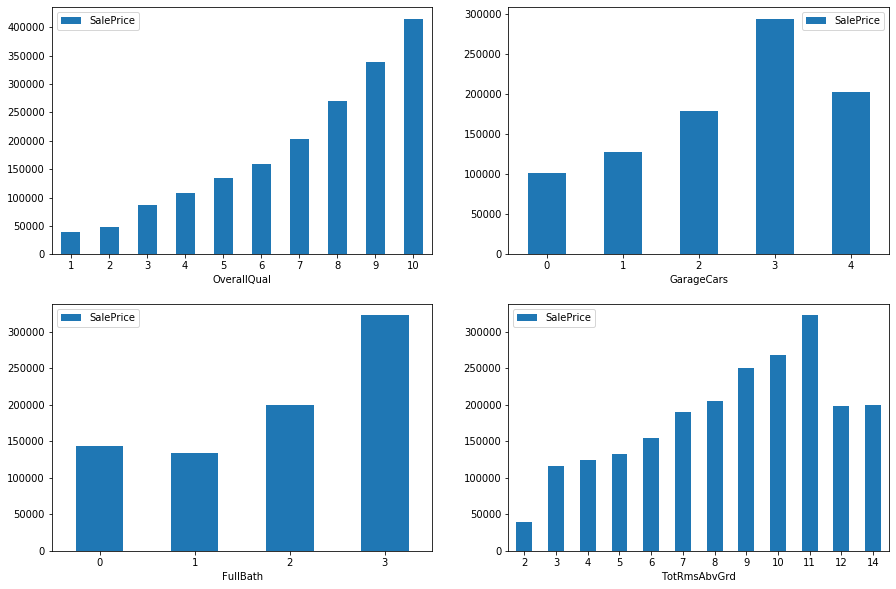

In [14]:
# define a function for plotting relationship between two variables using barplot
def plot_discrete(data, discrete_ft, on_target, agg_func, nrow, ncol):
    df = data.groupby(discrete_ft)[[on_target]].agg(agg_func)
    df.plot(kind = 'bar', ax = axes[nrow][ncol], rot = 0)
# plot relationship between discrete features and the target  
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (15, 10))
for i, ft in enumerate(high_corr_discrete):
    plot_discrete(num_target, ft, 'SalePrice', np.median, i//2, i%2)

##### The barplots for OverallQual shows a clear increasing trend. This implies that OverallQual is a good predictor. However, both GarageCars and TotRmsAbvGrd have a dip towards the upper extreme. And FullBath oddly shows higher price for properties with 0 Full Bath. This could have resulted from outliers, let's investigate these 3 features further by looking at the count of each discrete value.

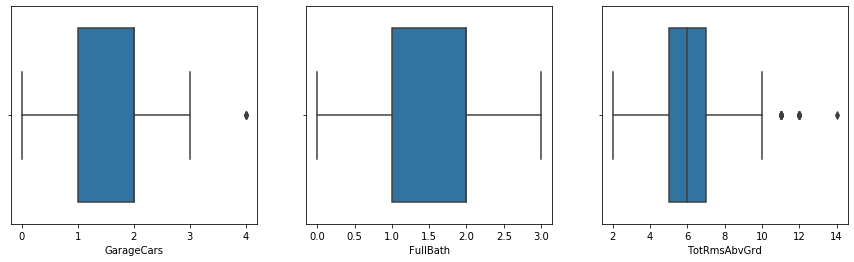

In [15]:
# check the boxplot of each feature
plt.figure(figsize = (15, 4))
plt.subplot(131)
sns.boxplot(num_target.GarageCars)
plt.subplot(132)
sns.boxplot(num_target.FullBath)
plt.subplot(133)
sns.boxplot(num_target.TotRmsAbvGrd)
plt.show()

##### There are some outliers in both GarageCars and TotRmsAbvGrd. Z-score can be applied to validate this finding.

In [16]:
# import zscore function from scipy stats library
from scipy.stats import zscore
# create a new dataframe for storing z-score of GarageCars and TotRmsAbvGrd
num_zscore = num_target.copy()
num_zscore = num_zscore.assign(TotRmsAbvGrd_zscore = zscore(num_zscore.TotRmsAbvGrd),
                               GarageCars_zscore = zscore(num_zscore.GarageCars))
# print the suspicious points from the boxplot above
print(num_zscore.loc[num_zscore.TotRmsAbvGrd >= 11,['TotRmsAbvGrd','TotRmsAbvGrd_zscore']])
print(num_zscore.loc[num_zscore.GarageCars == 4,['GarageCars', 'GarageCars_zscore']])

      TotRmsAbvGrd  TotRmsAbvGrd_zscore
Id                                     
1351            12             3.352971
528             11             2.737882
1387            12             3.352971
746             11             2.737882
1293            11             2.737882
1299            12             3.352971
12              11             2.737882
1143            11             2.737882
186             12             3.352971
770             12             3.352971
899             11             2.737882
119             11             2.737882
898             12             3.352971
876             11             2.737882
524             11             2.737882
1269            11             2.737882
1231            12             3.352971
636             14             4.583148
1441            11             2.737882
804             12             3.352971
567             11             2.737882
325             11             2.737882
911             12             3.352971


A z-score that is greater than 3 means the observed result is 3 standard deviations away from the mean. This could happen only 0.1% of the time. Thus the points are confirmed to be outliers.

In [17]:
# drop training data whose TotRmsAbvGrd_zscore OR GarageCars_zscore is greater than 3
drop_z_index = num_zscore[(num_zscore.TotRmsAbvGrd_zscore >= 3) | (num_zscore.GarageCars_zscore >= 3)].index
X_train_full.drop(drop_z_index, inplace= True)
y_train_full.drop(drop_z_index, inplace= True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Move on to highly correlated Continuous Features

##### I will start by plotting each one of the continuous features against the target. This will help me identify outliers in these features.

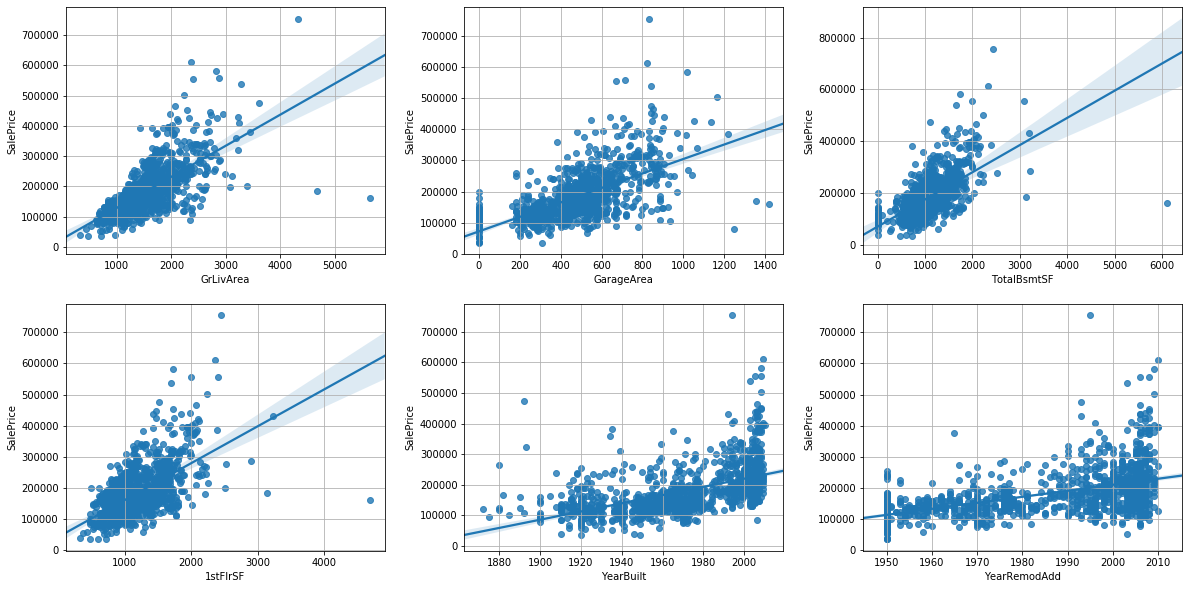

In [18]:
# create a list for storing highly correlated continuous features
high_corr_continuous = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']
# plot using scatter plot
plt.figure(figsize = (20, 10))
for i, ft in enumerate(high_corr_continuous):
    plt.subplot(2, 3, i+1)
    sns.regplot(num_target[ft], num_target['SalePrice'])
    plt.grid(True)
plt.subplots_adjust(wspace= 0.25)
plt.show()

##### The plots above show some outliers in the lower right corner of GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF. I will simply remove these outliers by inspection. The reason for doing this instead of dropping anything whose z-score is greater than 3 is because I want to keep some noise in my data, while removing the extreme noisy points:
- For GrLivArea: drop if GrLivArea > 4,000 AND SalePrice < 200,000
- For GarageArea: drop if GarageArea > 1,200 AND SalePrice < 200,000
- For TotalBsmtSF: drop if TotalBsmtSF > 6,000
- For 1stFlrSF: drop if 1stFlrSF > 4000


In [19]:
# drop training data based on the above criteria
# set errors = 'ignore' to suppress errors that could arise from referencing previously dropped rows
drop_GrLivArea_index = num_target[(num_target.GrLivArea > 4000) & (num_target.SalePrice < 200000)].index
X_train_full.drop(drop_GrLivArea_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_GrLivArea_index, inplace = True, errors= 'ignore')
drop_GarageArea_index = num_target[(num_target.GarageArea > 1200) & (num_target.SalePrice < 200000)].index
X_train_full.drop(drop_GarageArea_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_GarageArea_index, inplace = True, errors= 'ignore')
drop_Bsmt1stFlr_index = num_target[(num_target.TotalBsmtSF > 6000) | (num_target['1stFlrSF'] > 4000)].index
X_train_full.drop(drop_Bsmt1stFlr_index, inplace = True, errors= 'ignore')
y_train_full.drop(drop_Bsmt1stFlr_index, inplace = True, errors= 'ignore')

##### After removing the outliers, I will start looking at the missing values and explore potential ways to deal with them.
##### Start by determining the ratio of missing values in each feature.

In [20]:
# create a dataframe to store ratio of Null values
missing_ratio = {'Feature':[], 'Ratio':[]}
missing_ratio['Feature'] = X_train_full.columns
missing_ratio['Ratio'] = np.array(X_train_full.isnull().sum()/X_train_full.shape[0]*100)
# sort datafrane by Ratio in descending order
missing_df = pd.DataFrame(missing_ratio, index = np.arange(len(X_train_full.columns))).sort_values(by= 'Ratio', ascending= False)
# select features whose ratio is not 0
missing_df = missing_df[missing_df.Ratio != 0]

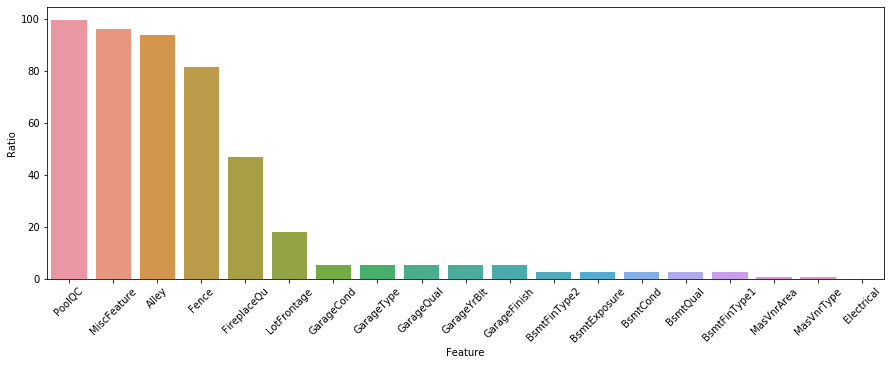

In [21]:
# visualze the dataframe
plt.figure(figsize = (15,5))
sns.barplot(missing_df.Feature, missing_df.Ratio)
plt.xticks(rotation = 45)
plt.show()

In [22]:
missing_num_cols = [col for col in missing_df.Feature if col in num_cols]
missing_cat_cols = [col for col in missing_df.Feature if col in cat_cols]

In [23]:
print(missing_num_cols)
print(missing_cat_cols)

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'MasVnrType', 'Electrical']


##  2a) drop rows with missing rows, without imputation
In this attempt, I will use all both numerical and catergorical features. All categorical features will be encoded based on its context (Nominal or Ordinal). In this section however, all missing values will be dropped without imputation. 

We will first check if this approach is applicable by checking the percentage of missing entries in every column. We will deem this approach not plausible due to loss of important information if this ratio is greater than 20%.

The bar graph above shows that most features (columns) contain no missing entries. The feature with the greater ratio of missing entries is 'LotFrontage', with a ratio of approximately 17.5%. And that is within the tolerable range. 

Next, I will drop all rows contain missing value on both the training and testing sets. Note, this should not result in data leakage since this process did not borrow any insights from the testing set.

In [65]:
temp_train = X_train.join(Y_train)
temp_test = X_test.join(Y_test)

temp_train.dropna(inplace = True)
temp_test.dropna(inplace = True)

X_train_2a, Y_train_2a = temp_train.drop(['SalePrice'], axis = 1), temp_train[['SalePrice']]
X_test_2a, Y_test_2a = temp_test.drop(['SalePrice'], axis = 1), temp_test[['SalePrice']]

Next, I will visualize each categorical feature and the respective relationship with the target variable using boxplot

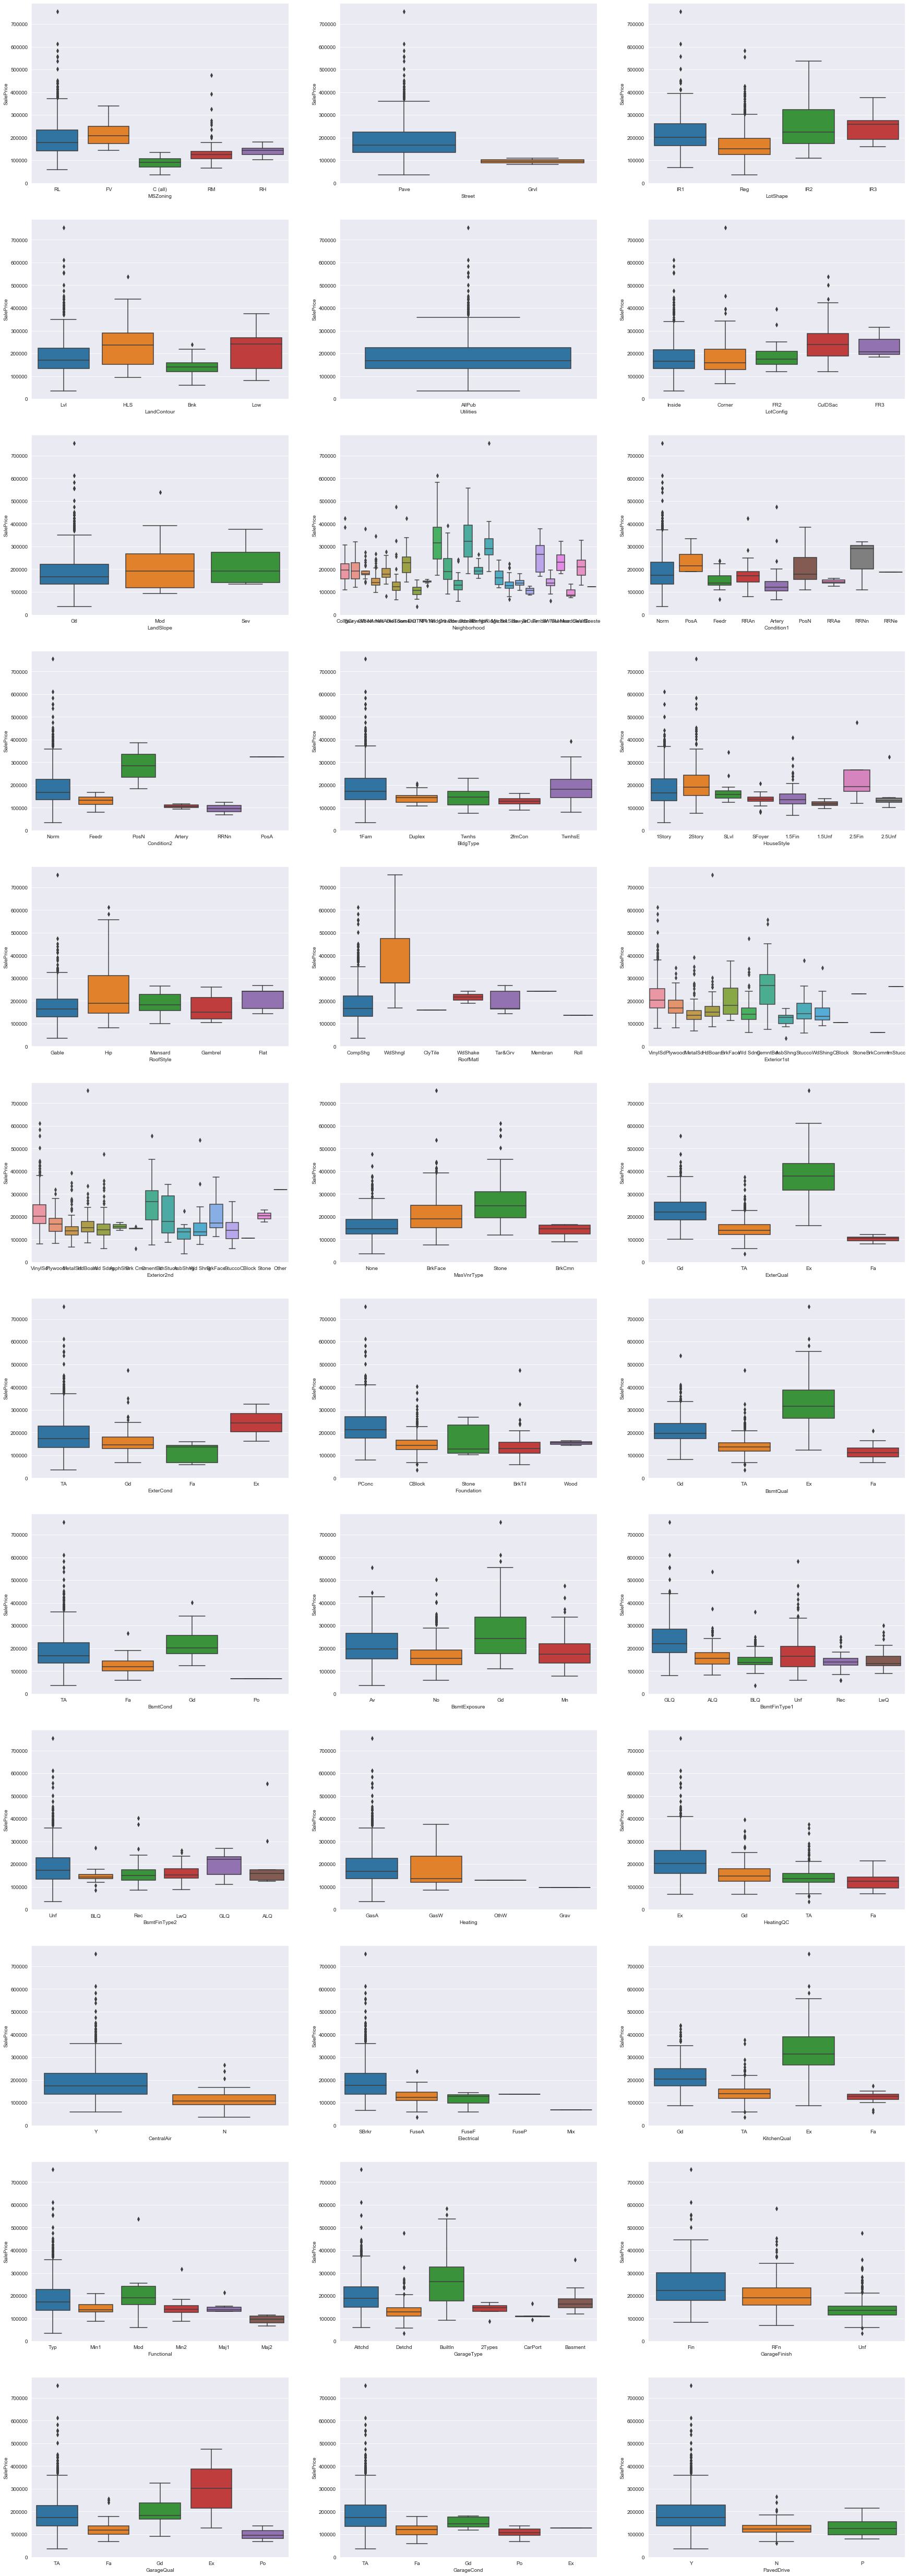

In [122]:
fig, axes = plt.subplots(12, 3, figsize = (30, 90))

for i, ft in enumerate(cat_cols):
    sns.boxplot(x = ft, y = 'SalePrice', data = temp_train, ax = axes[i//3][i%3])

After inspecting each numerical feature and its content, I decide to combine and generate these features in the following way:
- MSSubClass seems more like a categorical feature, will therefore be converted to str format
- YearBuilt represents the year the property was built in, will subtract from the max value (2010) to represent the age of property (Property_Age)
- YearRemodAdd will be treated the same way as YearBuilt, will be stored in a new column (Remod_Age)
- BsmtFinSF1 and BsmtFinSF2 will be summed together to stored in a new column (BsmtFinSF

### 2). Feature Engineering on numerical columns
For numerical features, we need to find the ones with high correlation with the target variable. Meanwhile, any two highly correlated variables might carry redundant information, and we should consider dropping one of them in hope of preventing overfitting.

In [12]:
# Find correlation between all numerical features as well as the target variable
corr_data = pd.DataFrame(data[['SalePrice'] + num_cols].corr())

In [13]:
# create a list that contains features whose correlation with target variable is greater than 0.4
high_corr_ft = corr_data.index[np.abs(corr_data.SalePrice) >= 0.4].to_list()
high_corr_ft.remove('SalePrice')
print('There are {} features that could be potential predictors of final price:\n {}'.format(len(high_corr_ft), high_corr_ft))

There are 13 features that could be potential predictors of final price:
 ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [14]:
# import required library
from scipy import stats
# double check features that are correlated with the target variable, 
# and assess its statistical significance with p-value using Pearson Correlation
for feature in high_corr_ft:
    # create a temporary dataframe for the feature and target variables
    temp_df = pd.DataFrame(X[feature]).join(Y)
    # drop rows with missing entries
    temp_df.dropna(inplace = True)
    pearson_coef, p_value = stats.pearsonr(temp_df[feature], temp_df['SalePrice'])
    print(feature + ":")
    print('The Pearson Correlation Coefficient is: {}, with a P-value: {}\n'.format(pearson_coef, p_value))

OverallQual:
The Pearson Correlation Coefficient is: 0.790981600583805, with a P-value: 2.185675268e-313

YearBuilt:
The Pearson Correlation Coefficient is: 0.5228973328794969, with a P-value: 2.9902290990158995e-103

YearRemodAdd:
The Pearson Correlation Coefficient is: 0.5071009671113861, with a P-value: 3.1649482419207935e-96

MasVnrArea:
The Pearson Correlation Coefficient is: 0.4774930470957156, with a P-value: 1.4585086425879671e-83

TotalBsmtSF:
The Pearson Correlation Coefficient is: 0.6135805515591953, with a P-value: 9.484229391507914e-152

1stFlrSF:
The Pearson Correlation Coefficient is: 0.6058521846919146, with a P-value: 5.394710618971284e-147

GrLivArea:
The Pearson Correlation Coefficient is: 0.7086244776126522, with a P-value: 4.518033646779431e-223

FullBath:
The Pearson Correlation Coefficient is: 0.560663762748446, with a P-value: 1.236470066760862e-121

TotRmsAbvGrd:
The Pearson Correlation Coefficient is: 0.5337231555820281, with a P-value: 2.772280932958432e-108


We can see that the result of Pearson Correlation confirms the correlation of numerical features we have selected. On top of that, the P-values are all close to 0 and well below 0.05, which indicates the correlations are highly statistically significant.
The next step would be to check if any two features above are highly correlated. Two highly correlated features might carry duplicated information, such as speed in m/s vs speed in miles/hr. In these cases, we might consider dropping one of them.

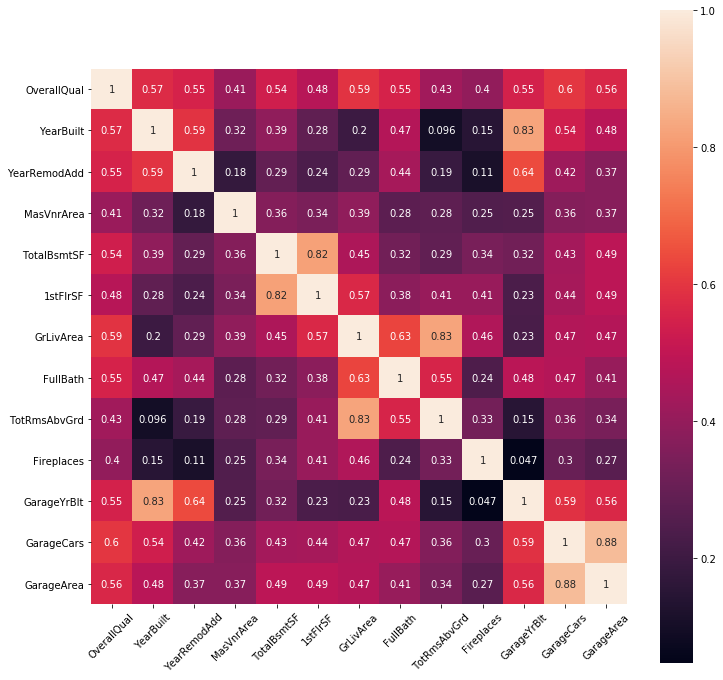

In [15]:
corr_ft = X[high_corr_ft].corr()

plt.figure(figsize= (12, 12))
sns.heatmap(corr_ft, annot= True, square= True)
plt.xticks(rotation = 45)
plt.show()

Using the heatmap above, we can better visualize the correlations between each predictor feature. 
There are couple highly correlated predictor features:
1. 1stFirSF (First Floor square feet) vs. TotalBsmtSF (Total square feet of basement area)
2. TotRmsAbvGrd (total rooms above ground, excluding bathrooms) vs. GrLivArea (Above ground living area square feet)
3. GarageYrBlt (Year garage was built) vs. YearBuilt (Original construction date)
4. GarageArea (Size of garage in square feet) vs. GarageCars (Size of garage in car capcity)

The high correlations among these 4 pairs of predictor features do seem quite intuitive. And we can definitely agree that some of them are conveying similar information. For example, GarageArea and GarageCars are both used to gauge a garage size. 

In terms of deciding which predictor feature to drop: 
1. I will keep the 4 predictor features in the first 2 pairs because I think they are all important attributes for evaluating a house price despite their similarity and high correlation.
2. For the 3rd pair, GarageYrBlt will be dropped since it has a lower correlation with the target.
3. For the 4th pair, GarageCars will be kept because it is a more intuitive and easier way to describe a garage size another person.

In [16]:
X_num_train = X_train.loc[:, high_corr_ft]
X_num_test = X_test.loc[:, high_corr_ft]
# create a list that contains the columns to be dropped based on the above analysis
drop_high_corr_ft = ['GarageYrBlt', 'GarageArea']
# drop columns
X_num_train.drop(drop_high_corr_ft, axis = 1, inplace = True)
X_num_test.drop(drop_high_corr_ft, axis = 1, inplace = True)

In [17]:
missing_high_corr = [col for col in X_num_train.columns if X_num_train[col].isnull().any()]
for col in missing_high_corr:
    print('{} has {} missing entries.\n'.format(col, str(X_num_train[col].isnull().sum())))

MasVnrArea has 8 missing entries.



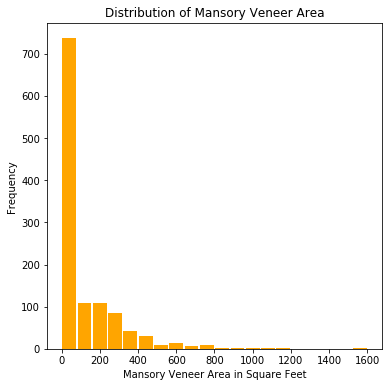

In [18]:
plt.figure(figsize= (6, 6))
sns.distplot(X_num_train['MasVnrArea'].dropna(), 
             kde= False, color= 'orange', bins = 20,
             hist_kws={"rwidth":0.9, 'alpha':1.0})
plt.xlabel('Mansory Veneer Area in Square Feet')
plt.ylabel('Frequency')
plt.title('Distribution of Mansory Veneer Area')
plt.show()

From the distribution of 'MasVnrArea' feature above, we can see it is highly skewed. Therefore, when dealing with the missing entry, it makes more sense to use Median as a imputation strategy, rather than mean.

In [19]:
imputer_num = SimpleImputer(strategy = 'median', add_indicator= True)

imputed_X_num_cols = list(X_num_train.columns)
for col in missing_high_corr:
    imputed_X_num_cols.append(col + '_missing')

imputed_X_num_train = pd.DataFrame(imputer_num.fit_transform(X_num_train), columns= imputed_X_num_cols)
imputed_X_num_test = pd.DataFrame(imputer_num.transform(X_num_test), columns= imputed_X_num_cols)

In [20]:
imputed_X_num_train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,MasVnrArea_missing
0,5.0,1900.0,2003.0,0.0,1272.0,1272.0,2200.0,2.0,9.0,0.0,0.0,0.0
1,4.0,1900.0,2000.0,0.0,0.0,694.0,1294.0,2.0,7.0,0.0,0.0,0.0
2,7.0,2005.0,2005.0,0.0,1310.0,1310.0,1310.0,2.0,6.0,1.0,2.0,0.0
3,7.0,1989.0,1989.0,340.0,807.0,1175.0,1982.0,2.0,7.0,1.0,2.0,0.0
4,6.0,2004.0,2004.0,0.0,839.0,864.0,1593.0,2.0,8.0,1.0,2.0,0.0


In [24]:
num_outsample_error, num_insample_error = bl_score(imputed_X_num_train, imputed_X_num_test, Y_train, Y_test)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:29:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
# print out-of-sample and in-sample prediction errors
print('Out-of-Sample mean-absolute-error is: {}'.format(num_outsample_error))
print('In-Sample mean-absolute-error is: {}'.format(num_insample_error))

Out-of-Sample mean-absolute-error is: 18170.316526648116
In-Sample mean-absolute-error is: 8872.144477739726


### 3). Feature Engineering on categorical columns
For categorical features, we can use boxplot to visualzie each predictor and evaluate its predictability of the target variable.

Let's start off by printing all categorical features and manually select features based on its definition and relevance to the target variable. This would typically require some domain knowledge to make a better judgement call.

In [21]:
for i in range(0,len(cat_cols),4):
    print('{:20}{:20}{:20}{:20}'.format(cat_cols[i], cat_cols[i+1], cat_cols[i+2], cat_cols[i+3]))

MSZoning            Street              LotShape            LandContour         
Utilities           LotConfig           LandSlope           Neighborhood        
Condition1          Condition2          BldgType            HouseStyle          
RoofStyle           RoofMatl            Exterior1st         Exterior2nd         
MasVnrType          ExterQual           ExterCond           Foundation          
BsmtQual            BsmtCond            BsmtExposure        BsmtFinType1        
BsmtFinType2        Heating             HeatingQC           CentralAir          
Electrical          KitchenQual         Functional          GarageType          
GarageFinish        GarageQual          GarageCond          PavedDrive          


In [22]:
data.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

Id
922     145900
521     106250
402     164990
281     228500
1402    193000
Name: SalePrice, dtype: int64